<h5>Heatmap individual boxes in log2(reads+1/total reads)</h5>

In [ ]:
import pandas as pd
import seaborn as sns
import math
%matplotlib inline

# def log2calc(boxTotal, experimensTotal):
#     math.log2(boxTotal+1/experimensTotal)

heatdf = pd.read_excel('developmentFiles/replicaltwo/intersections_REP2/MYC3/MYC3_PBE_merged_intersect.xls')
heatdf = heatdf.fillna(0.0)
heatdf = heatdf.drop(columns=["start", "chr", "end"])
heatdf = heatdf.set_index('boxname')
heatdf = heatdf.applymap(lambda v: v+1)
# globaldataframe
for column in heatdf:
    
    totalColumn = heatdf[column].sum()
    lencolumn = len(heatdf[column])
    meanCollumn = totalColumn/lencolumn
    heatdf[column] = heatdf[column].map(lambda boxSum: math.log2(boxSum/meanCollumn))
# Input/Input
# MYCH7/MYCH7
# MYC3/MYC3
heatdf
img = sns.heatmap(heatdf, cmap="YlGnBu", robust=True)
img.figure.savefig('developmentFiles/replicaltwo/intersections_REP2/MYC3/MYC3_PBE_merged_intersect.jpg', format='jpeg', dpi=300, bbox_inches="tight")

In [ ]:
import pandas as pd
import seaborn as sns
import math
%matplotlib inline

# def log2calc(boxTotal, experimensTotal):
#     math.log2(boxTotal+1/experimensTotal)

heatdf = pd.read_excel('developmentFiles/replicaltwo/intersections_REP2/ERF1/ERF1_Index_GCC_merged_intersect.xls')
heatdf = heatdf.fillna(0.0)
heatdf = heatdf.drop(columns=["start", "chr", "end"])
heatdf = heatdf.set_index('boxname')
heatdf = heatdf.applymap(lambda v: v+1)
# globaldataframe
for column in heatdf:
    
    totalColumn = heatdf[column].sum()
    lencolumn = len(heatdf[column])
    meanCollumn = totalColumn/lencolumn
    heatdf[column] = heatdf[column].map(lambda boxSum: boxSum/totalColumn)
# Input/Input
# MYCH7/MYCH7
# MYC3/MYC3
heatdf
img = sns.heatmap(heatdf, cmap="YlGnBu", robust=True)
# img.figure.savefig('developmentFiles/replicaltwo/intersections_REP2/MYC3/MYC3_PBE_merged_intersect.jpg', format='jpeg', dpi=300, bbox_inches="tight")

merge with inputs

In [9]:
import pandas as pd
import seaborn as sns
import math
%matplotlib inline

experiments = pd.read_excel('developmentFiles/replicaltwo/intersections_REP2/MYC3/MYC3_TG_merged_intersect.xls')
inputsexperiments = pd.read_excel('developmentFiles/replicaltwo/intersections_REP2/Input/Input_TG_merged_intersect.xls')
mergedDf = experiments.merge(inputsexperiments, on=['chr', 'start', 'end', 'boxname'], how='outer')
mergedDf.to_excel('developmentFiles/replicaltwo/intersections_REP2/MYC3/MYC3_Index_TG_merged_intersect.xls', index=False)

In [ ]:
import pandas as pd
import seaborn as sns
import math
%matplotlib inline

# def log2calc(boxTotal, experimensTotal):
#     math.log2(boxTotal+1/experimensTotal)

heatdf = pd.read_excel('developmentFiles/replicaltwo/intersections_REP2/ERF1/ERF1_Index_GCC_merged_intersect.xls')
heatdf = heatdf.fillna(0.0)
heatdf = heatdf.drop(columns=["start", "chr", "end"])
heatdf = heatdf.set_index('boxname')
heatdf = heatdf.applymap(lambda v: v+1)
totalBoxMatch = {}
for column in heatdf:
    
    totalColumn = heatdf[column].sum()

    totalBoxMatch[column] = totalColumn
print(totalBoxMatch)    

In [ ]:
reads = pd.read_csv('developmentFiles/replicaltwo/intersections_REP2/tableSummaryReplica2.csv', sep=';')
reads = reads.drop(labels=['ID', 'Total Alignment'], axis=1)
readstotal = {}
for index, row in reads.iterrows():
    readstotal[row['Name'].replace('/', '').strip()] =  int(row['Reads'])
#     print(row['Name'].replace('/', ''), row['Reads'])
print(readstotal)

In [ ]:
D = {}
for experiment in totalBoxMatch:
#     D[experiment] = (int(totalBoxMatch[experiment])/readstotal[experiment])
    D[experiment] = (int(totalBoxMatch[experiment]))
#     D[experiment] = (readstotal[experiment])
    try:
        print(experiment.strip())
    except:
        print('ESTE TENGO QUE SACAR EL NUMERO DE READS ' + experiment)

In [ ]:
import matplotlib.pyplot as plt



plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xticks(rotation=90)
# plt.savefig('developmentFiles/replicaltwo/intersections_REP2/Erf1GCC_entre_lecturas.jpg', format='jpeg', dpi=300, bbox_inches="tight")

**CURRENT APROACH**

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
%matplotlib inline

# def log2calc(boxTotal, experimensTotal):
#     math.log2(boxTotal+1/experimensTotal)

heatdf = pd.read_excel('developmentFiles/replicaltwo/intersections_REP2/ERF1/ERF1_Index_GCC_merged_intersect.xls')
heatdf = heatdf.fillna(0.0)
heatdf = heatdf.drop(columns=["start", "chr", "end"])
heatdf = heatdf.set_index('boxname')
# heatdf = heatdf.applymap(lambda v: v+1)
# scaleFactors = {}
for column in heatdf:
    totalColumn = heatdf[column].sum()
#     print(column ,totalColumn)
    heatdf[column] = heatdf[column].map(lambda boxSum: (boxSum/totalColumn)*1000000)
    
#     scaleFactors[column] = totalColumnRPKs/1000000
# for column in heatdf:
#     heatdf[column] = heatdf[column].map(lambda RPK: RPK/scaleFactors[column])

# print(scaleFactors)

In [31]:
pd.options.mode.use_inf_as_na = True
# heatdf = heatdf.replace('inf',0)
heatdf = heatdf.fillna(0.0)
heatdf

,ERF1direct1Mock.total,ERF1amplified1Mock.total,ERF1direct1JA.total,ERF1amplified1JA.total,ERF1direct1ACC.total,ERF1amplified1ACC.total,ERF1direct6Mock.total,ERF1amplified6Mock.total,ERF1direct6JA.total,ERF1amplified6JA.total,ERF1direct6ACC.total,ERF1direct24Mock.total,ERF1amplified24Mock.total,ERF1direct24JA.total,ERF1amplified24JA.total,ERF1direct24ACC.total,ERF1amplified24ACC.total
boxname,,,,,,,,,,,,,,,,,
GCC00001,0.327314,0.187573,1.007569,0.770911,0.575980,0.339589,0.182893,0.235996,0.171103,0.096119,0.342981,0.844240,0.058595,0.474681,0.218743,0.600035,3.164546
GCC01771,2.200278,0.687769,1.066837,0.212001,3.839869,1.605330,0.627060,0.305671,0.823435,0.190903,1.646311,2.374426,0.197758,1.661385,2.406168,0.450026,0.282549
GCC00002,1.400177,0.141081,0.553175,0.256970,3.071895,0.987895,0.390171,0.251729,0.191699,0.052213,0.182923,1.160830,0.054933,1.582271,1.749940,0.225013,0.960666
GCC00003,0.540068,0.365047,0.995715,0.555056,1.151961,0.401332,0.682799,0.100692,0.156845,0.088109,0.274385,1.125654,0.117190,14.240443,2.624911,0.900053,0.645826
GCC01772,1.680212,0.634864,0.778961,0.308364,0.575980,0.246974,2.316639,0.503458,0.246470,0.201392,0.224497,2.713630,0.301345,2.531634,2.624911,1.260074,1.808312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCC12623,3.800480,0.000000,0.395125,0.102788,0.493697,0.194051,0.000000,0.000000,0.261408,0.274118,0.365847,2.954841,0.087892,0.569618,0.174994,1.575092,0.904156
GCC11288,0.000000,0.000000,1.066837,0.000000,0.000000,0.000000,0.975427,0.377593,0.313689,0.117479,1.371925,6.753923,0.219731,0.000000,0.000000,6.300368,0.000000
GCC11442,0.000000,0.000000,1.896600,0.154182,0.000000,0.000000,2.438568,0.503458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.450026,0.678117


In [13]:
import math
# heatdf = heatdf.applymap(lambda v: v+1)
heatdf = heatdf.fillna(0.0)
pd.options.mode.use_inf_as_na = True
for column in heatdf:    
    heatdf[column] = heatdf[column].map(lambda boxSum: math.log2(boxSum))
plt.figure(figsize = (16,10))
img = sns.heatmap(heatdf, cmap="YlGnBu")

ValueError: math domain error

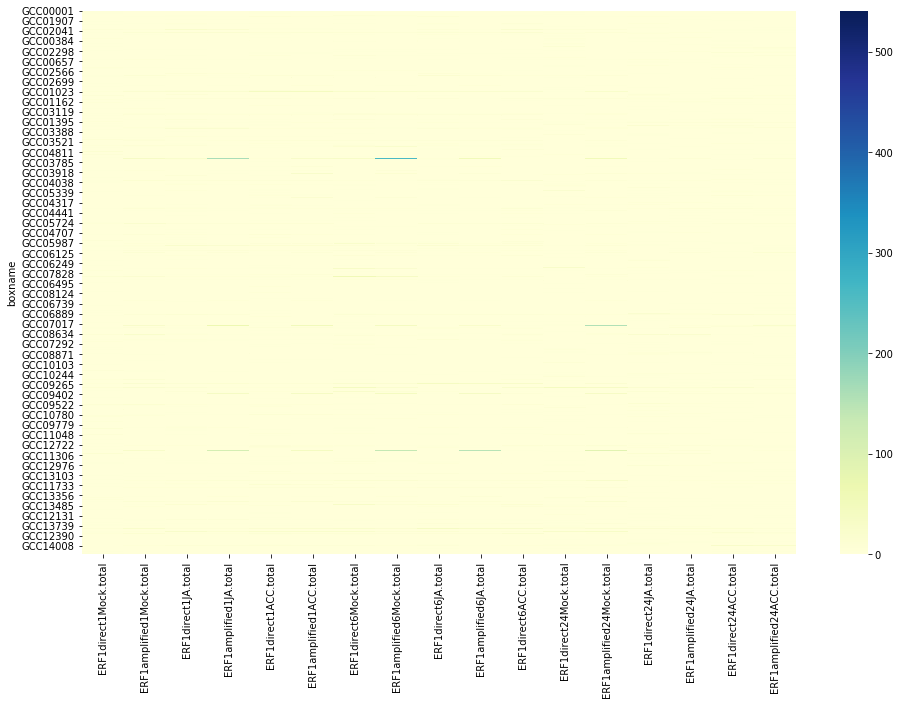

In [33]:
plt.figure(figsize = (16,10))
img = sns.heatmap(heatdf, cmap="YlGnBu")
# img.figure.savefig('developmentFiles/replicaltwo/intersections_REP2/yoquese.jpg', format='jpeg', dpi=300, bbox_inches="tight")

In [10]:
setExperimets = [
    '1Mock',
    '1JA',
    '1ACC',
    '6Mock',
    '6JA',
    '6ACC',
    '24Mock',
    '24JA',
    '24ACC'
]


In [11]:
# heatdf = heatdf.applymap(lambda v: v+1)
for experiment in setExperimets:
    for index, row in heatdf.iterrows():
    #     print(row['ERF1amplified1Mock.total'])
        try:
            row['ERF1amplified' + experiment + '.total'] =  row['ERF1amplified' + experiment + '.total'] / row['Inputamplified' + experiment + '.total']

            row['ERF1direct' + experiment + '.total'] = row['ERF1direct' + experiment + '.total'] / row['Inputamplified' + experiment + '.total']
        except:
            row['ERF1direct' + experiment + '.total'] = row['ERF1direct' + experiment + '.total'] / row['Inputamplified' + experiment + '.total']

for experiment in setExperimets:
    heatdf = heatdf.drop(columns=['Inputamplified' + experiment + '.total'])

C:\Users\JOAQUINGR\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\JOAQUINGR\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\JOAQUINGR\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\JOAQUINGR\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\JOAQUINGR\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\JOAQUINGR\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
heatdf

In [ ]:
import math
heatdf = heatdf.applymap(lambda v: v+1)
for column in heatdf:    
    heatdf[column] = heatdf[column].map(lambda boxSum: math.log2(boxSum))
plt.figure(figsize = (16,10))
img = sns.heatmap(heatdf, cmap="YlGnBu")

In [ ]:
heatdf